In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pull_bandit(bandit):
    if bandit == 0:
        _mean = 0.2
        _range = 0.4
    elif bandit == 1:
        _mean = 0.4
        _range = 0.4
    elif bandit == 2:
        _mean = 0.6
        _range = 0.4
    elif bandit == 3:
        _mean = 0.8
        _range = 0.4
    else:
        print('Invalid Bandit')
    reward = np.random.uniform(_mean - (_range/2), _mean + (_range/2))
    return reward

In [3]:
pull_bandit(1)

0.44832567344552215

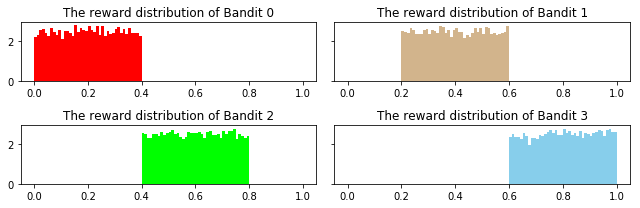

In [4]:
def plot_bandit_distributions(num_samples=10000, bins=100, num_bandits=4):
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 3), sharey=True)
    axs = [ax1, ax2, ax3, ax4]
    colors = ['red', 'tan', 'lime', 'skyblue']
    for i in range(num_bandits):
        x = np.zeros(num_samples)
        for j in range(num_samples):
            x[j] = pull_bandit(i)
        axs[i].hist(x, range=(0,1), density=True, bins=bins, color=colors[i])
        axs[i].set_title('The reward distribution of Bandit ' + str(i))
    plt.tight_layout()
    plt.show()
plot_bandit_distributions()              

In [5]:
def upper_confidence_bound(max_trails=10000, resolution=100, num_bandits=4):
    bandits_pulled = np.zeros(num_bandits)
    bandits_confidence = np.ones(num_bandits)*np.inf
    bandits_total_reward = np.zeros(num_bandits)
    bandits_average_reward = np.zeros(num_bandits)
    bandits_upperbound = bandits_average_reward + bandits_confidence
    total_reward = 0
    best_bandit = 0
    avg_reward = []
    for n in range(1, max_trails+1):
        reward = pull_bandit(best_bandit)
        bandits_pulled[best_bandit] += 1
        bandits_total_reward[best_bandit] += reward
        total_reward += reward
        bandits_average_reward[best_bandit] = bandits_total_reward[best_bandit]/bandits_pulled[best_bandit]
        bandits_confidence[best_bandit] = np.sqrt((2*np.log(n))/bandits_pulled[best_bandit])
        bandits_upperbound[best_bandit] = bandits_average_reward[best_bandit] + bandits_confidence[best_bandit]
        max_upperbound = np.amax(bandits_upperbound)
        best_bandit = np.argmax(bandits_upperbound)
        if n%resolution == 0:
            avg_reward.append(total_reward/n)
    #print(total_reward/10000)
    return avg_reward
ucb_avg_reward = upper_confidence_bound()

In [15]:
def epsilon_greedy(max_trails=10000, num_bandits=4, resolution = 100, epsilon=0.1):
    bandits_pulled = np.zeros(num_bandits)
    bandits_total_reward = np.zeros(num_bandits)
    bandits_average_reward = np.zeros(num_bandits)
    bandits_one2n = np.arange(num_bandits)
    total_reward = 0
    current_bandit = 0
    avg_reward = []
    for n in range(1, max_trails+1):
        reward = pull_bandit(current_bandit)
        bandits_pulled[current_bandit] += 1
        bandits_total_reward[current_bandit] += reward
        total_reward += reward
        bandits_average_reward[current_bandit] = bandits_total_reward[current_bandit]/bandits_pulled[current_bandit]
        best_bandit = np.argmax(bandits_average_reward)
        rand = np.random.uniform()
        
        if n%resolution == 0:
            avg_reward.append(total_reward/n)
        
        if rand > epsilon:
            current_bandit = best_bandit
        else:
            current_bandit = np.random.randint(num_bandits)
    return avg_reward
    #print(total_reward/10000)
epsilon_greedy_avg_reward = epsilon_greedy()

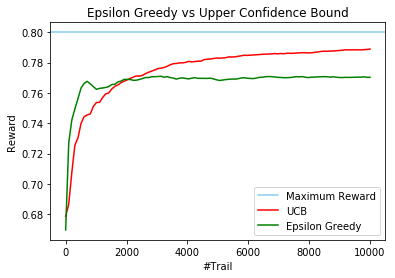

In [16]:
t = np.linspace(0, 10000, 100)
plt.axhline(y=0.8, color = 'skyblue', label = 'Maximum Reward')
plt.plot(t, ucb_avg_reward, color='red', label='UCB')
plt.plot(t, epsilon_greedy_avg_reward, color = 'green', label = 'Epsilon Greedy')
plt.title('Epsilon Greedy vs Upper Confidence Bound')
plt.xlabel('#Trail')
plt.ylabel('Reward')
plt.legend()
plt.show()

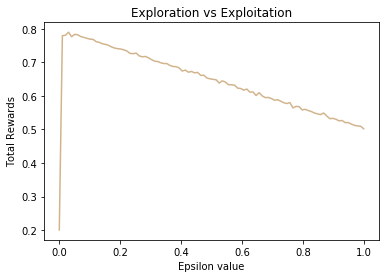

In [11]:
def epsilon_sweep(num_epsilons= 100):
    rewards = []
    for i in range(num_epsilons):
        rewards.append(epsilon_greedy(epsilon = i/num_epsilons)[-1])
    t = np.linspace(0, 1, 100)
    plt.plot(t, rewards, color='tan')
    plt.xlabel('Epsilon value')
    plt.ylabel('Total Rewards')
    plt.title('Exploration vs Exploitation')
epsilon_sweep()